<a href="https://colab.research.google.com/github/RitikaSen27/IDEAS-TIH-INTERNSHIP/blob/main/10_unsupervised_learning_with_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Title: Unsupervised Learning with Dimensionality Reduction and Clustering

**Authors:** Koustab Ghosh<sup>1</sup> & Sujoy Kumar Biswas<sup>2</sup>

**Affiliation**:
1. Researcher, IDEAS-TIH, Indian Statistical Institute, Kolkata
2. Head of Research & Innovation, IDEAS-TIH, Indian Statistical Institute, Kolkata

**Dated**: Sep 07th, 2025


We shall work with the MNIST handwritten digits' image dataset. The details about the dataset is available [here](https://en.wikipedia.org/wiki/MNIST_database).

We need the scikit-learn library to import the various machine leanring models for our study.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

## Question 1. Complete the following lines of code for K-Means clustering

(10, 64)


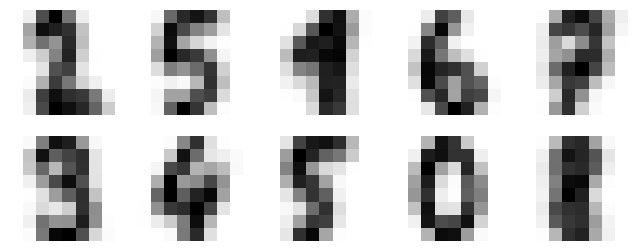

In [3]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Load the dataset
digits = load_digits()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)

print(kmeans.cluster_centers_.shape)

# Optional: visualize the cluster centers as images
fig, axes = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for ax, center in zip(axes.flat, centers):
    ax.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    ax.axis('off')
plt.show()


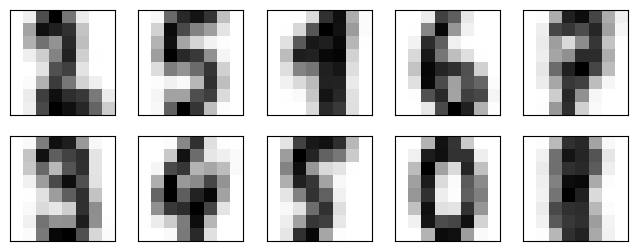

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits.

Next, we shall apply dimensioanlity reduction of MNIST handwritten datasets with PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

## Question 2. Complete the following lines of code for

Step 1. Dimensionality reduction with PCA. The 8x8=64 dimensional data need to be reduced to 2-dimensional.

Step 2. K-means clustering should be done on the reduced diemnsional data. Initial K value should be set to 10 like before.

Step 3. Visualization code is supplied below.

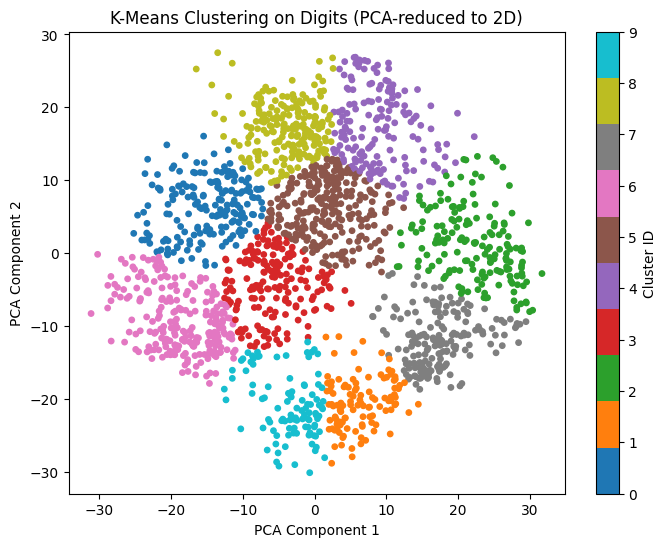

In [5]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 0: Load dataset
digits = load_digits()
data = digits.data

# Step 1: PCA dimensionality reduction to 2D
model = PCA(n_components=2)
reduced_data = model.fit_transform(data)

# Step 2: KMeans clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(reduced_data)

# Step 3: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='tab10', s=15)
plt.title("K-Means Clustering on Digits (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster ID")
plt.show()


**Data Visualization**

We shall visualize the reduced diemnsion and cluster data (overlapped) with the help of the following code snippet.

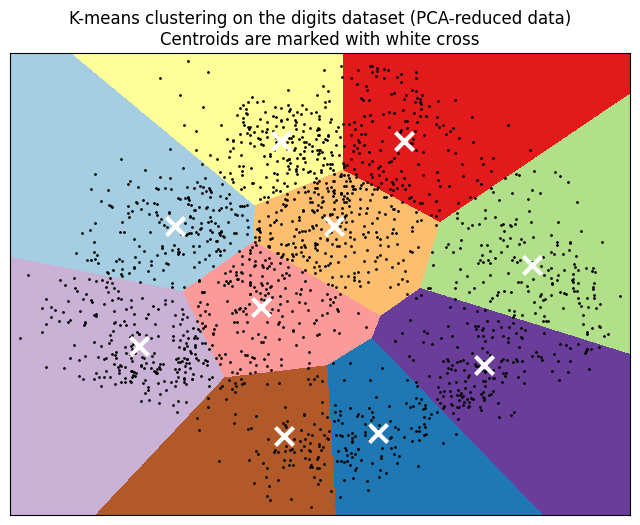

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 0: Load dataset
digits = load_digits()
data = digits.data

# Step 1: PCA dimensionality reduction to 2D
model = PCA(n_components=2)
reduced_data = model.fit_transform(data)

# Step 2: KMeans clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0).fit(reduced_data)

# Step 3: Visualization with decision boundaries
h = 0.02  # Step size in the mesh

# Define mesh grid
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict cluster for each grid point
clusters = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
clusters = clusters.reshape(xx.shape)

# Plot decision boundaries
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.imshow(
    clusters,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

# Plot original reduced data points
plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

# Plot centroids as white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)

plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


## Question 3.

Find a high dimensional dataset of you choice. Show how you load the dataset. Do the basic exploratory data analysis to become familiar with the dataset.


## Question 4.

Next, the objective would be to reduce the dimension of your dataset and do the clustering on it. Complete the following code for clustering in an object-oriented manner. Do the exact process as above: PCA dimension reduction followed by clustering.

A template code is provided below for your guidance.

```

class YourDataClustering:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
        self.data = ______
        self.labels = ______
        self.kmeans = ______
        self.scaled_data = ______

    def load_data(self):
        """Load the Iris dataset"""
        iris = ________.________()
        self.data = iris.________
        return ________

    def preprocess_data(self):
        """Standardize the dataset"""
        scaler = _________.__________()
        self.scaled_data = scaler.________(________)
        return ________

    def apply_kmeans(self):
        """Apply KMeans clustering"""
        self.kmeans = ________.________(n_clusters=self.n_clusters, random_state=42)
        self.labels = self.kmeans.________(________)
        return ________

    def evaluate_clusters(self):
        """Compute silhouette score"""
        score = ________.________(________, ________)
        print(f"Silhouette Score: {score:.3f}")
        return ________

    def visualize_clusters_matplotlib(self):
        """Visualize clustering result using Matplotlib"""
        plt.scatter(________[:, 0], ________[:, 1], c=________, cmap='viridis')
        plt.title("KMeans Clustering on Iris Dataset (Matplotlib)")
        plt.xlabel("________")
        plt.ylabel("________")
        plt.show()

    def visualize_clusters_opencv(self):
        """Visualize clustering result using OpenCV"""
        canvas = np.ones((______, ______, 3), dtype=np.uint8) * 255
        colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
        scaled = (________[:, :2] * 100 + 250).astype(int)

        for i, point in enumerate(________):
            cv2.circle(canvas, tuple(point), 5, colors[________ % 3], -1)

        cv2.imshow("KMeans Clustering (OpenCV)", ________)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

```

The following code executes all teh parts of teh complete system.

```

  # Step 1: Create clustering object
    clustering = _________(n_clusters=3)

    # Step 2: Load dataset
    data = clustering.________()

    # Step 3: Preprocess dataset
    scaled_data = clustering.________()

    # Step 4: Apply KMeans clustering
    labels = clustering.________()

    # Step 5: Evaluate clusters
    score = clustering.________()

    # Step 6: Visualize with Matplotlib
    clustering.________()

    # Step 7: Visualize with OpenCV
    clustering.________()
  ```